In [6]:
# Load all helper function
%run -i '../util/helper.py'

In [2]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For images
from IPython.display import Image
# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Load dataset
import os
files = [f for f in os.listdir('../Dataset/original') if f.endswith(".csv")]
print(files)

customer_data      = pd.read_csv('../Dataset/original/olist_customers_dataset.csv')
seller_data        = pd.read_csv('../Dataset/original/olist_sellers_dataset.csv')
geolocation_data   = pd.read_csv('../Dataset/original/olist_geolocation_dataset.csv')
product_data       = pd.read_csv('../Dataset/original/olist_products_dataset.csv')
order_data         = pd.read_csv('../Dataset/original/olist_orders_dataset.csv')
order_item_data    = pd.read_csv('../Dataset/original/olist_order_items_dataset.csv')
order_payment_data = pd.read_csv('../Dataset/original/olist_order_payments_dataset.csv')
order_review_data  = pd.read_csv('../Dataset/original/olist_order_reviews_dataset.csv')

['olist_sellers_dataset.csv', 'product_category_name_translation.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv']


In [16]:
# Drop duplication
customer_data.drop_duplicates(inplace=True)
seller_data.drop_duplicates(inplace=True)
geolocation_data.drop_duplicates(inplace=True)
product_data.drop_duplicates(inplace=True)
order_data.drop_duplicates(inplace=True)
order_item_data.drop_duplicates(inplace=True)
order_payment_data.drop_duplicates(inplace=True)
order_review_data.drop_duplicates(inplace=True)

In [17]:
geolocation_data.columns = ['geolocation_zip_code', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state']

order_item_data.rename(columns={'order_item_id':'quantity'}, inplace=True)

order_item_data= order_item_data.assign(sale = lambda x: x['quantity']*x['price'])

## Review

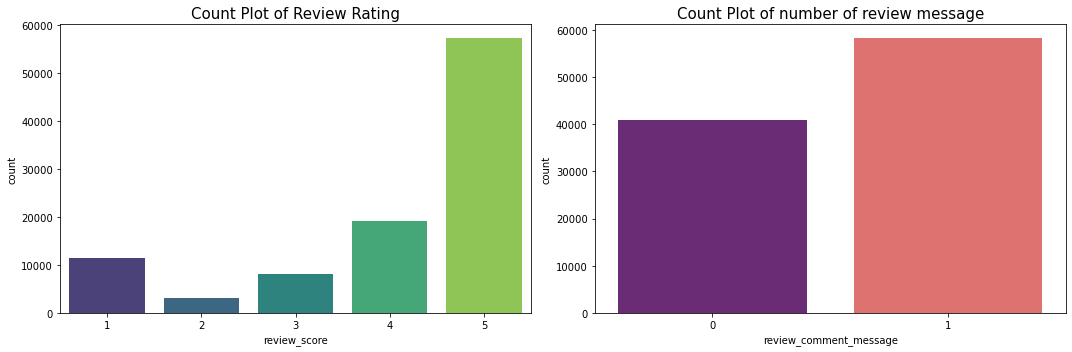

In [19]:
fig, ax= plt.subplots(ncols=2,figsize=(15,5))
sns.countplot(x='review_score', data=order_review_data, palette='viridis', ax=ax[0])
ax[0].set_title('Count Plot of Review Rating', fontsize=15)
sns.countplot(x='review_comment_message', palette='magma', ax=ax[1],
              data=pd.DataFrame(order_review_data['review_comment_message'].isna()).astype(int))
ax[1].set_title('Count Plot of number of review message', fontsize=15)
fig.tight_layout()